# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Load Dataset & Check null Values

In [25]:
df=pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [27]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [28]:
df.duplicated().sum()

0

In [29]:
df['ApplicationDate']=pd.to_datetime(df['ApplicationDate'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

# Encoding Objects

In [31]:
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=encoder.fit_transform(df[col])

In [32]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,0,4,22,13152,48,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,0,0,15,26045,48,2,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,0,1,26,17627,36,1,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,0,3,34,37898,96,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,0,0,17,9184,36,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


# Split Data into Train & Test

In [33]:
X = df.drop(columns=['ApplicationDate', 'LoanApproved'])  # Dropping non-relevant columns
Y = df['LoanApproved']  # Target variable

In [34]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42 , shuffle=True)

In [35]:
#Check
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (4000, 34)
Y_Test Shape =  (4000,)
X_Train Shape =  (16000, 34)
Y_Train Shape =  (16000,)


# Build Classification Modeling

In [36]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each model
for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred)
    recall = recall_score(y_test, obj_pred)
    f1 = f1_score(y_test, obj_pred)

    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest   0.99200   0.987141  0.981318  0.984221
1          Naive Bayes   0.92075   0.859343  0.823009  0.840784
2  Logistic Regression   0.91775   0.883073  0.779744  0.828198


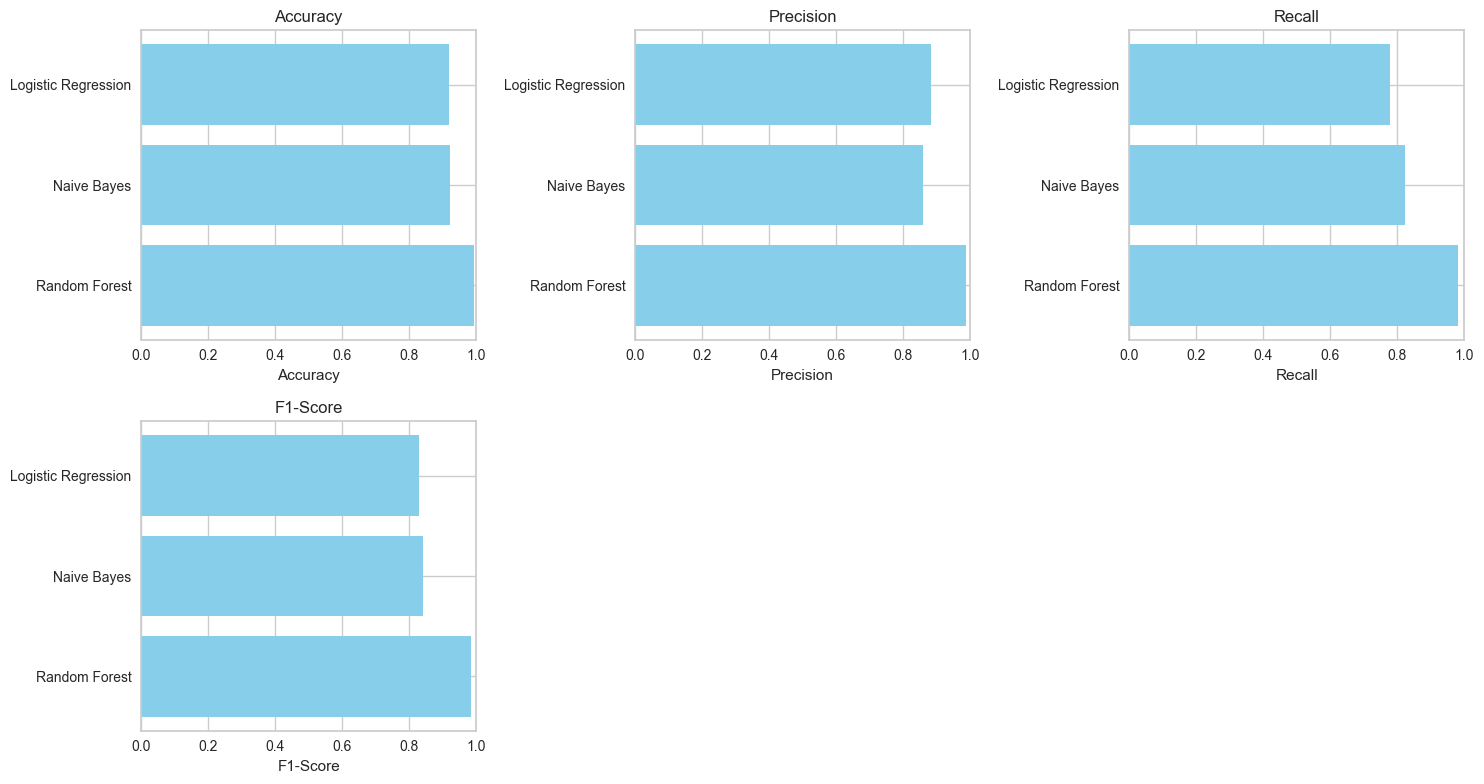

In [38]:
# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()


# Building Regression Modeling 

In [44]:
x = df.drop(columns=['ApplicationDate','RiskScore'])  
y = df['RiskScore']

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [47]:
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    "MLP_Regressor": MLPRegressor(max_iter=500)
}

In [49]:
# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                        Model           MSE        MAE          R²
0           Linear_Regression      4.061483   1.526113    0.934584
1      RandomForest_Regressor      0.893659   0.591995    0.985606
2  GradientBoosting_Regressor      0.334014   0.421673    0.994620
3      DecisionTree_Regressor      1.951140   0.786200    0.968574
4                         SVM     37.923310   4.719510    0.389195
5               MLP_Regressor  13341.561782  78.612584 -213.883357


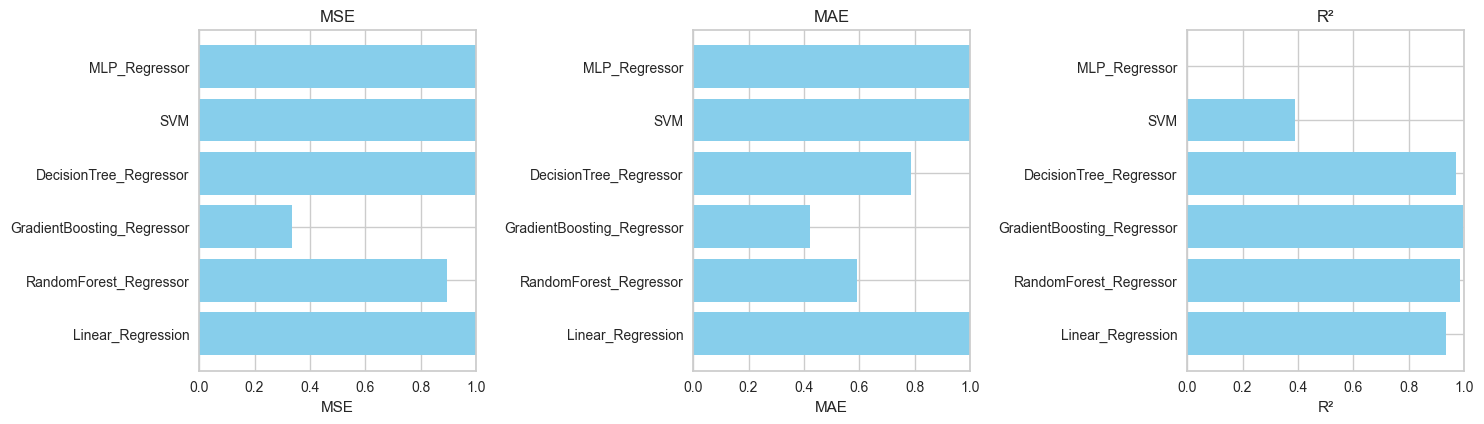

In [50]:
# Plotting each metric
metrics = ['MSE', 'MAE', 'R²']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()
